In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [4]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [6]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [9]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [10]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(sqlalchemy.desc(Measurement.date)).first()

('2017-08-23',)

<Axes: xlabel='Year to Date', ylabel='Inches'>

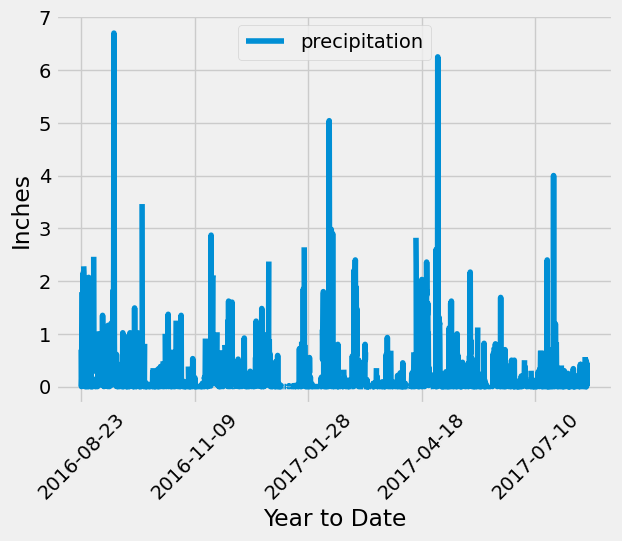

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
new_date = session.query(Measurement.date).order_by(sqlalchemy.desc(Measurement.date)).first()
# Calculate the date one year from the last date in data set.
one_year = dt.date.fromisoformat(new_date[0]) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date = session.query(Measurement.date,Measurement.prcp).order_by(sqlalchemy.desc(Measurement.date)).filter(Measurement.date >= one_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
percipitation_df = pd.DataFrame(date, columns=['date', 'precipitation'])

# Sort the dataframe by date
percipitation_df = percipitation_df.sort_values(by='date')


# Use Pandas Plotting with Matplotlib to plot the data
percipitation_df.plot(x = 'date', xlabel='Year to Date',ylabel='Inches', rot=45)

In [80]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitation_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [119]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [128]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').all()
station_df = pd.DataFrame(data=station)
data = [station_df.min(),station_df.max(),station_df.mean()]
data

[tobs    54.0
 dtype: float64,
 tobs    85.0
 dtype: float64,
 tobs    71.663781
 dtype: float64]

<Axes: xlabel='Temperature', ylabel='Frequency'>

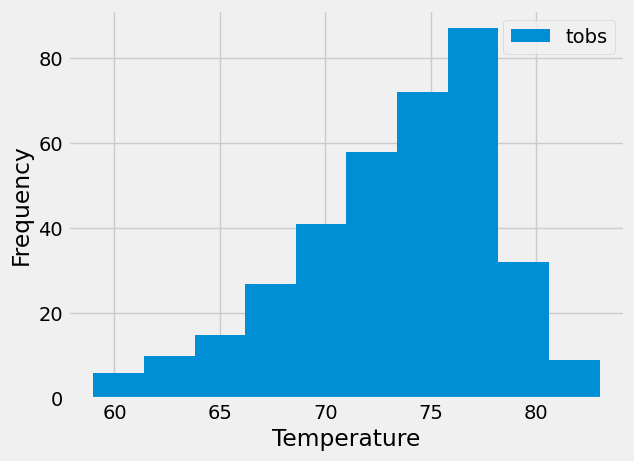

In [135]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
new_date = session.query(Measurement.date).order_by(sqlalchemy.desc(Measurement.date)).filter(Measurement.station == 'USC00519281').first()
one_year = dt.date.fromisoformat(new_date[0]) - dt.timedelta(days=365)

m12 = session.query(Measurement.tobs,Measurement.date).filter(Measurement.station =='USC00519281', Measurement.date >=one_year).all()
df = pd.DataFrame(data=m12)
df.plot.hist(xlabel='Temperature')


# Close Session

In [136]:
# Close Session
session.close()
